This is an exploratory data analysis of the spotify 2023 most streamed dataset aimed to explore patterns in audio features to understand trends and preferences in popular songs.

In [185]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [186]:
df= pd.read_csv('/Users/shashankbaluni/Documents/Customer Analytics/Kaggle Spotify Project/spotify.csv', encoding='ISO-8859-1')
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

**Observations**
* The data consists of 24 columns
* some rows have null values

**Data pre-processing**
* There is a row in which wrong values are there in the "streams" column so we remove this
* After removing that row we can convert the streams column into an integer data type

In [188]:
df['streams'].unique()

array(['141381703', '133716286', '140003974', '800840817', '303236322',
       '183706234', '725980112', '58149378', '95217315', '553634067',
       '505671438', '58255150', '1316855716', '387570742', '2513188493',
       '1163093654', '496795686', '30546883', '335222234', '363369738',
       '86444842', '52135248', '1297026226', '200647221', '115364561',
       '78300654', '899183384', '61245289', '429829812', '127408954',
       '22581161', '52294266', '843957510', '999748277', '618990393',
       '123122413', '188933502', '1355959075', '786181836', '176553476',
       '354495408', '2808096550', '1109433169', '1047101291', '65156199',
       '570515054', '1085685420', '1647990401', '2565529693', '518745108',
       '107753850', '177740666', '153372011', '57876440', '1813673666',
       '3703895074', '256483385', '1214083358', '16011326', '812019557',
       '111947664', '156338624', '720434240', '357925728', '674072710',
       '1755214421', '404562836', '373199958', '14780425', '395

In [189]:
df = df.drop(index = 574)
df['streams'] = df['streams'].astype(int)

In [190]:
#checking which columns have null values in them
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

Since there are missing values in "in_shazam_charts" column we fill the null values with 0

we cross-check all the null values again

In [191]:
df["in_shazam_charts"].fillna(0,inplace=True)
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts         0
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

#### Audio features of top 10 most streamed songs

In [192]:
# top 10 most streamed songs
top = df.sort_values(by=["streams"],ascending=False).head(10)
top

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,171,C#,Major,50,38,80,0,0,9,7
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,...,96,C#,Minor,83,93,65,58,0,9,8
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,...,110,C#,Major,50,45,41,75,0,11,3
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,533,...,98,F#,Minor,82,54,59,69,0,18,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,...,90,D,Major,76,91,50,54,0,7,5
162,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2713922350,433,...,104,C#,Major,77,36,63,1,0,36,5
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2665343922,492,...,170,C#,Major,59,48,76,4,0,10,5
140,Believer,Imagine Dragons,1,2017,1,31,18986,23,2594040133,250,...,125,A#,Minor,77,74,78,4,0,23,11
725,Closer,"The Chainsmokers, Halsey",2,2016,5,31,28032,0,2591224264,315,...,95,G#,Major,75,64,52,41,0,11,3
48,Starboy,"The Weeknd, Daft Punk",2,2016,9,21,29536,79,2565529693,281,...,186,G,Major,68,49,59,16,0,13,28


In [193]:
# top 10 least streamed songs
bottom = df.sort_values(by=["streams"],ascending=True).head(10)
bottom

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
123,Que Vuelvas,"Carin Leon, Grupo Frontera",2,2022,12,9,763,26,2762,21,...,162,A#,Major,49,78,64,19,0,11,4
393,Jhoome Jo Pathaan,"Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...",6,2022,12,22,138,4,1365184,13,...,105,G,Major,82,62,74,10,0,33,7
144,QUEMA,"Sog, Ryan Castro, Peso Pluma",3,2023,7,13,437,31,11599388,17,...,97,NaN,Major,79,92,89,5,0,6,5
142,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",2,2023,6,1,293,8,11956641,5,...,133,B,Minor,93,68,65,42,0,12,25
68,Overdrive,Post Malone,1,2023,7,14,410,36,14780425,36,...,140,C#,Major,56,48,73,0,0,35,4
58,S91,Karol G,1,2023,7,14,525,41,16011326,34,...,128,NaN,Minor,86,42,72,59,0,9,19
30,Rush,Troye Sivan,1,2023,7,13,864,78,22581161,71,...,126,F,Minor,74,35,84,0,0,11,6
248,Danger (Spider) (Offset & JID),"Offset, JID",2,2023,6,2,214,0,24975653,3,...,143,B,Major,83,25,69,4,0,23,12
104,New Jeans,NewJeans,1,2023,7,7,77,35,29562220,8,...,134,E,Minor,81,53,72,51,0,12,5
193,Better Than Revenge (Taylor's Version),Taylor Swift,1,2023,7,7,86,11,30343206,3,...,146,B,Minor,50,67,89,0,0,19,8


In [194]:
# keep only selected columns of top 10 most streamed songs
selected_columns = top[['track_name', 'artist(s)_name', 'artist_count','released_year','streams','bpm', 'danceability_%', 'valence_%', 'energy_%','acousticness_%', 'liveness_%', 'speechiness_%']]
selected_columns.tail(10)

,track_name,artist(s)_name,artist_count,released_year,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,3703895074,171,50,38,80,0,9,7
179,Shape of You,Ed Sheeran,1,2017,3562543890,96,83,93,65,58,9,8
86,Someone You Loved,Lewis Capaldi,1,2018,2887241814,110,50,45,41,75,11,3
620,Dance Monkey,Tones and I,1,2019,2864791672,98,82,54,59,69,18,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,2808096550,90,76,91,50,54,7,5
162,One Dance,"Drake, WizKid, Kyla",3,2016,2713922350,104,77,36,63,1,36,5
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,2665343922,170,59,48,76,4,10,5
140,Believer,Imagine Dragons,1,2017,2594040133,125,77,74,78,4,23,11
725,Closer,"The Chainsmokers, Halsey",2,2016,2591224264,95,75,64,52,41,11,3
48,Starboy,"The Weeknd, Daft Punk",2,2016,2565529693,186,68,49,59,16,13,28


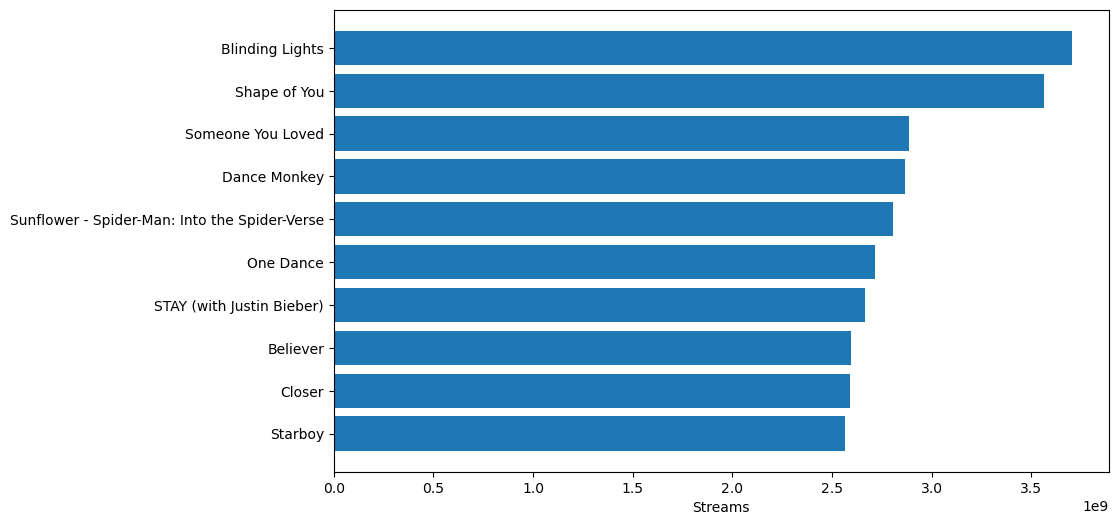

In [195]:
# Create a bar chart of top 10 songs vs streams
plt.figure(figsize=(10, 6))
plt.barh(top['track_name'], top['streams'])
plt.xlabel('Streams')
plt.gca().invert_yaxis()  # To display the artist with the highest streams at the top
plt.show()

In [196]:
# keep only selected columns of top 10 least streamed songs
selected_columns_1 = bottom[['track_name', 'artist(s)_name', 'artist_count','released_year','streams','bpm', 'danceability_%', 'valence_%', 'energy_%','acousticness_%', 'liveness_%', 'speechiness_%']]
selected_columns_1

,track_name,artist(s)_name,artist_count,released_year,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,liveness_%,speechiness_%
123,Que Vuelvas,"Carin Leon, Grupo Frontera",2,2022,2762,162,49,78,64,19,11,4
393,Jhoome Jo Pathaan,"Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...",6,2022,1365184,105,82,62,74,10,33,7
144,QUEMA,"Sog, Ryan Castro, Peso Pluma",3,2023,11599388,97,79,92,89,5,6,5
142,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",2,2023,11956641,133,93,68,65,42,12,25
68,Overdrive,Post Malone,1,2023,14780425,140,56,48,73,0,35,4
58,S91,Karol G,1,2023,16011326,128,86,42,72,59,9,19
30,Rush,Troye Sivan,1,2023,22581161,126,74,35,84,0,11,6
248,Danger (Spider) (Offset & JID),"Offset, JID",2,2023,24975653,143,83,25,69,4,23,12
104,New Jeans,NewJeans,1,2023,29562220,134,81,53,72,51,12,5
193,Better Than Revenge (Taylor's Version),Taylor Swift,1,2023,30343206,146,50,67,89,0,19,8


**Observations**

In order the following are the top 10 most streamed songs
* Blinding Lights
* Shape Of You
* Someone You Loved
* Dance Monkey
* Sunflower - Spider-Man Into the Spider-Verse
* One Dance
* STAY(with Justin Bieber)
* Believer
* CLoser
* Starboy

#### Audio features of top 10 most streamed artists

2. What were the most streamed artists on spotify in 2023?

* Since in the "artits(s)_name" column there are multiple artists in a single colummn and want to find the Number of streams for each artist we need to separate artists into seperate rows 

In [197]:
df["artist(s)_name"] = df['artist(s)_name'].str.split(',')
df_exploded = df.explode('artist(s)_name')

In [198]:
#renaming the column
df_exploded.rename(columns={"artist(s)_name":"artist_name"},inplace=True)

In [199]:
df_exploded["artist_name"]=df_exploded["artist_name"].astype(str)
df_exploded

,track_name,artist_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),Latto,2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
0,Seven (feat. Latto) (Explicit Ver.),Jung Kook,2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,A Veces (feat. Feid),Paulo Londra,2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,Feid,3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5
951,En La De Ella,Sech,3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5
951,En La De Ella,Jhayco,3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


* There might be a chance that after the separation of artists there are extra spaces in the new rows hence we remove all the extra spaces from these rows

In [200]:
df_exploded["artist_name"]=df_exploded["artist_name"].str.lstrip()
df_exploded

,track_name,artist_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),Latto,2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
0,Seven (feat. Latto) (Explicit Ver.),Jung Kook,2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,A Veces (feat. Feid),Paulo Londra,2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,Feid,3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5
951,En La De Ella,Sech,3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5
951,En La De Ella,Jhayco,3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


* After all the pre-processing we use group all the songs of each artist and take the sum so we get the total number of streams each artist has gained after adding all the streams of their songs
* After this we sort the values obtained from the operation done above and obtain the top 10 most streamed artists 

In [201]:
artist_streams = df_exploded.groupby('artist_name')['streams'].sum().sort_values(ascending=False).head(10)
df_artist_streams = artist_streams.head(10).reset_index()

# Rename the columns
df_artist_streams.columns = ['Artist', 'Streams']
df_artist_streams

,Artist,Streams
0,The Weeknd,23929760757
1,Bad Bunny,23813527270
2,Ed Sheeran,15316587718
3,Taylor Swift,14630378183
4,Harry Styles,11608645649
5,Eminem,10193727260
6,Dua Lipa,9980020481
7,Justin Bieber,8243081039
8,Drake,8043031261
9,BTS,7780428159


In [203]:
# all songs of top 10 artists

selected_names = df_artist_streams['Artist'].tolist()
selected_names
# Filter the DataFrame based on the condition using isin
filtered_df = df_exploded[df_exploded['artist_name'].isin(selected_names)]
top_artist= filtered_df[['artist_name','track_name', 'artist_count','released_year','streams','bpm', 'danceability_%', 'valence_%', 'energy_%','acousticness_%', 'liveness_%', 'speechiness_%']]
top_artist.sort_values(by=["streams"],ascending=False)

,artist_name,track_name,artist_count,released_year,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,liveness_%,speechiness_%
55,The Weeknd,Blinding Lights,1,2019,3703895074,171,50,38,80,0,9,7
179,Ed Sheeran,Shape of You,1,2017,3562543890,96,83,93,65,58,9,8
162,Drake,One Dance,3,2016,2713922350,104,77,36,63,1,36,5
84,Justin Bieber,STAY (with Justin Bieber),2,2021,2665343922,170,59,48,76,4,10,5
48,The Weeknd,Starboy,2,2016,2565529693,186,68,49,59,16,13,28
...,...,...,...,...,...,...,...,...,...,...,...,...
83,Taylor Swift,Back To December (Taylor's Version),1,2023,39228929,142,50,20,64,1,12,3
552,The Weeknd,Every Angel is Terrifying,1,2022,37307967,118,44,52,94,11,4,29
113,Taylor Swift,Mine (Taylor's Version),1,2023,36912123,121,65,49,78,0,17,4
577,The Weeknd,Phantom Regret by Jim,1,2022,31959571,108,46,23,48,75,14,4


In [205]:
# summarize the audio features of top 10 artists
agg_funcs = {
    'streams': 'sum',
    'artist_count': 'max',
    'released_year': 'min',
    'bpm': 'mean',
    'danceability_%': 'mean',
    'valence_%': 'mean',
    'energy_%': 'mean',
    'acousticness_%': 'mean',
    'liveness_%': 'mean',
    'speechiness_%': 'mean'
}

# Group by 'artist_name' and apply the aggregation functions
grouped_df = top_artist.groupby('artist_name').agg(agg_funcs)

# Reset index to make 'artist_name' a regular column
grouped_df.reset_index(inplace=True)

# Print the resulting DataFrame
grouped_df.sort_values(by=["streams"],ascending=False)

,artist_name,streams,artist_count,released_year,bpm,danceability_%,valence_%,energy_%,acousticness_%,liveness_%,speechiness_%
9,The Weeknd,23929760757,3,2015,117.648649,60.216216,43.648649,63.729730,20.189189,20.621622,8.081081
1,Bad Bunny,23813527270,3,2019,123.950000,74.425000,50.700000,69.125000,23.725000,19.550000,11.275000
4,Ed Sheeran,15316587718,2,1996,113.571429,71.428571,55.642857,63.142857,32.571429,17.500000,5.142857
8,Taylor Swift,14630378183,2,2010,124.000000,59.973684,34.157895,55.157895,31.473684,16.657895,7.026316
6,Harry Styles,11608645649,1,2019,128.529412,61.352941,54.000000,58.882353,42.823529,14.294118,5.352941
5,Eminem,10193727260,2,1999,122.555556,79.666667,47.222222,74.111111,6.444444,22.555556,16.444444
3,Dua Lipa,9980020481,3,2016,111.777778,75.666667,74.222222,80.333333,6.111111,15.666667,9.000000
7,Justin Bieber,8243081039,3,2011,137.571429,68.142857,57.857143,63.285714,31.285714,21.571429,12.714286
2,Drake,8043031261,3,2016,133.578947,73.684211,30.526316,54.684211,5.526316,23.105263,19.947368
0,BTS,7780428159,3,2019,117.461538,68.923077,63.307692,72.307692,11.384615,21.692308,8.615385


**Observations**

Top 10 most streamed artists on spotify in 2023 are the following -
* The weeknd
* Bad Bunny 
* Ed Sheeran
* Taylor Swift 
* Harry Styles
* Eminem
* Dua Lipa 
* Justin Bieber
* Drake
* BTS 

In [206]:
# audio features of "The Weeknd" songs
selected_names = ['The Weeknd']
# Filter the DataFrame based on the condition using isin
filtered_df = df_exploded[df_exploded['artist_name'].isin(selected_names)]
top_artist= filtered_df[['artist_name','track_name', 'artist_count','released_year','streams','bpm', 'danceability_%', 'valence_%', 'energy_%','acousticness_%', 'liveness_%', 'speechiness_%']]
top_artist.sort_values(by=["streams"],ascending=False).head(10)

,artist_name,track_name,artist_count,released_year,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,liveness_%,speechiness_%
55,The Weeknd,Blinding Lights,1,2019,3703895074,171,50,38,80,0,9,7
48,The Weeknd,Starboy,2,2016,2565529693,186,68,49,59,16,13,28
325,The Weeknd,The Hills,1,2015,1947371785,136,36,12,57,9,14,8
47,The Weeknd,Die For You,1,2016,1647990401,134,59,51,52,9,15,7
164,The Weeknd,Save Your Tears,1,2020,1591223784,118,68,61,82,2,50,3
292,The Weeknd,Call Out My Name,1,2018,1449799467,134,45,17,60,21,33,4
310,The Weeknd,Save Your Tears (with Ariana Grande) (Remix),2,2020,1221813483,118,65,63,79,3,10,3
32,The Weeknd,Creepin',3,2022,843957510,98,71,17,61,36,8,5
288,The Weeknd,I Was Never There,2,2018,705469769,114,32,17,74,14,17,3
371,The Weeknd,After Hours,1,2020,698086140,109,66,16,57,10,12,3


In [207]:
# audio features of "Bad Bunny" songs
selected_names = ['Bad Bunny']
# Filter the DataFrame based on the condition using isin
filtered_df = df_exploded[df_exploded['artist_name'].isin(selected_names)]
top_artist= filtered_df[['artist_name','track_name', 'artist_count','released_year','streams','bpm', 'danceability_%', 'valence_%', 'energy_%','acousticness_%', 'liveness_%', 'speechiness_%']]
top_artist.sort_values(by=["streams"],ascending=False).head(10)

,artist_name,track_name,artist_count,released_year,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,liveness_%,speechiness_%
555,Bad Bunny,Dakiti,2,2020,1763363713,110,73,14,57,40,11,5
87,Bad Bunny,Me Porto Bonito,2,2022,1440757818,92,91,43,71,9,9,8
368,Bad Bunny,LA CANCIï¿½,2,2019,1435127549,176,75,43,65,15,11,32
790,Bad Bunny,Callaita,2,2019,1304313953,176,61,24,62,60,24,31
192,Bad Bunny,Titi Me Preguntï¿,1,2022,1264310836,107,65,19,72,10,13,25
422,Bad Bunny,Yonaguni,1,2021,1260594497,180,64,44,65,28,14,12
239,Bad Bunny,Efecto,1,2022,1047480053,98,80,23,48,14,6,5
377,Bad Bunny,Moscow Mule,1,2022,909001996,100,80,29,67,29,12,3
528,Bad Bunny,Lo Siento BB:/ (with Bad Bunny & Julieta Venegas),3,2021,775542072,170,64,14,70,9,9,8
696,Bad Bunny,La Santa,2,2020,759208783,93,74,59,87,3,8,5


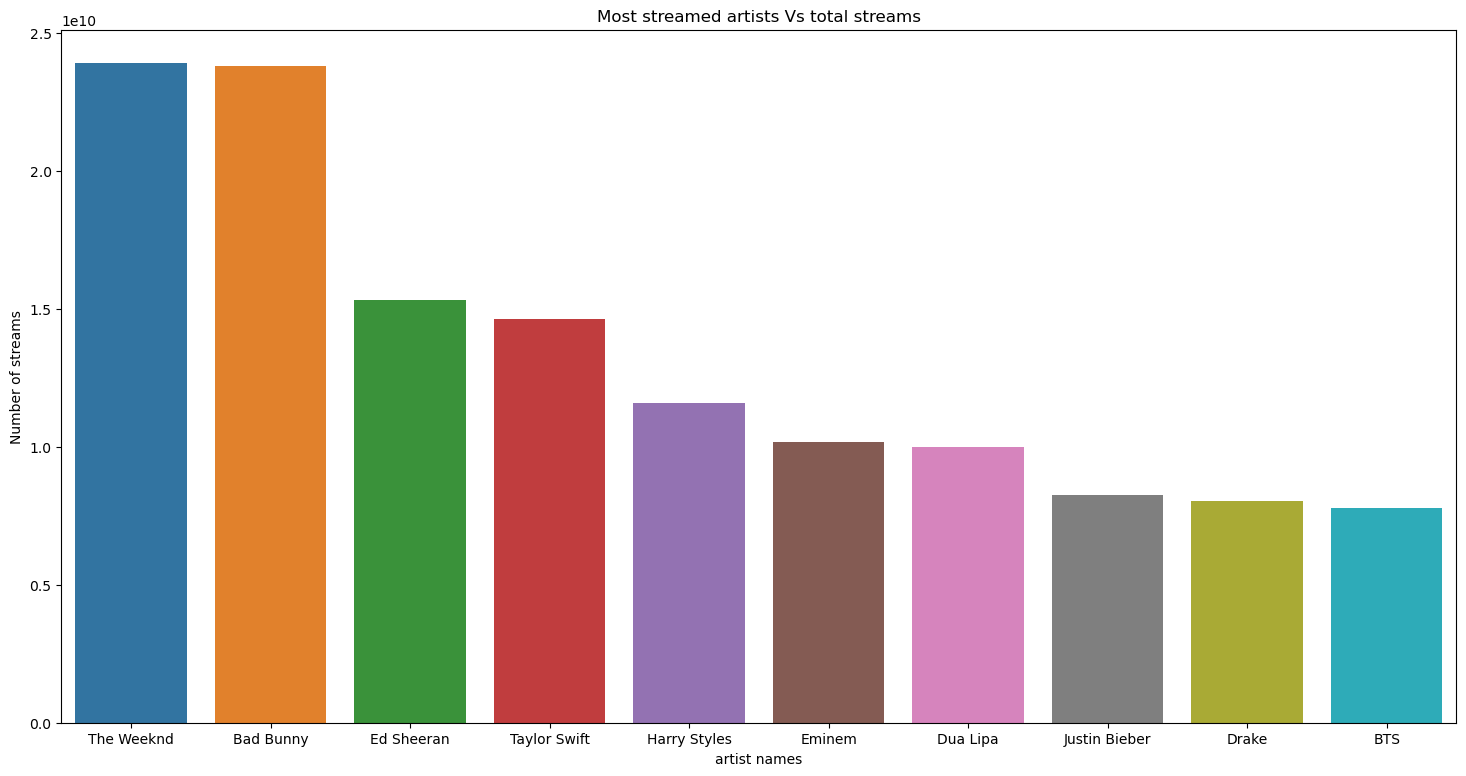

In [208]:
import seaborn as sns
plt.figure(figsize=(18,9))
plt.title("Most streamed artists Vs total streams")
plt.ylabel("Number of streams")
plt.xlabel("artist names")
sns.barplot(x=artist_streams.index.tolist()[:11],y=artist_streams.values.tolist()[:11])
plt.show()

**Observations**

* The Weekend and Bad Bunny have the most streams and they dominate the spotify streams and have a lot of streams compared to other artists

#### Explore audio features of all Spotify songs

[2023, 2019, 2022, 2013, 2014, 2018, 2017, 2020, 2016, 2012, 2021, 2015]


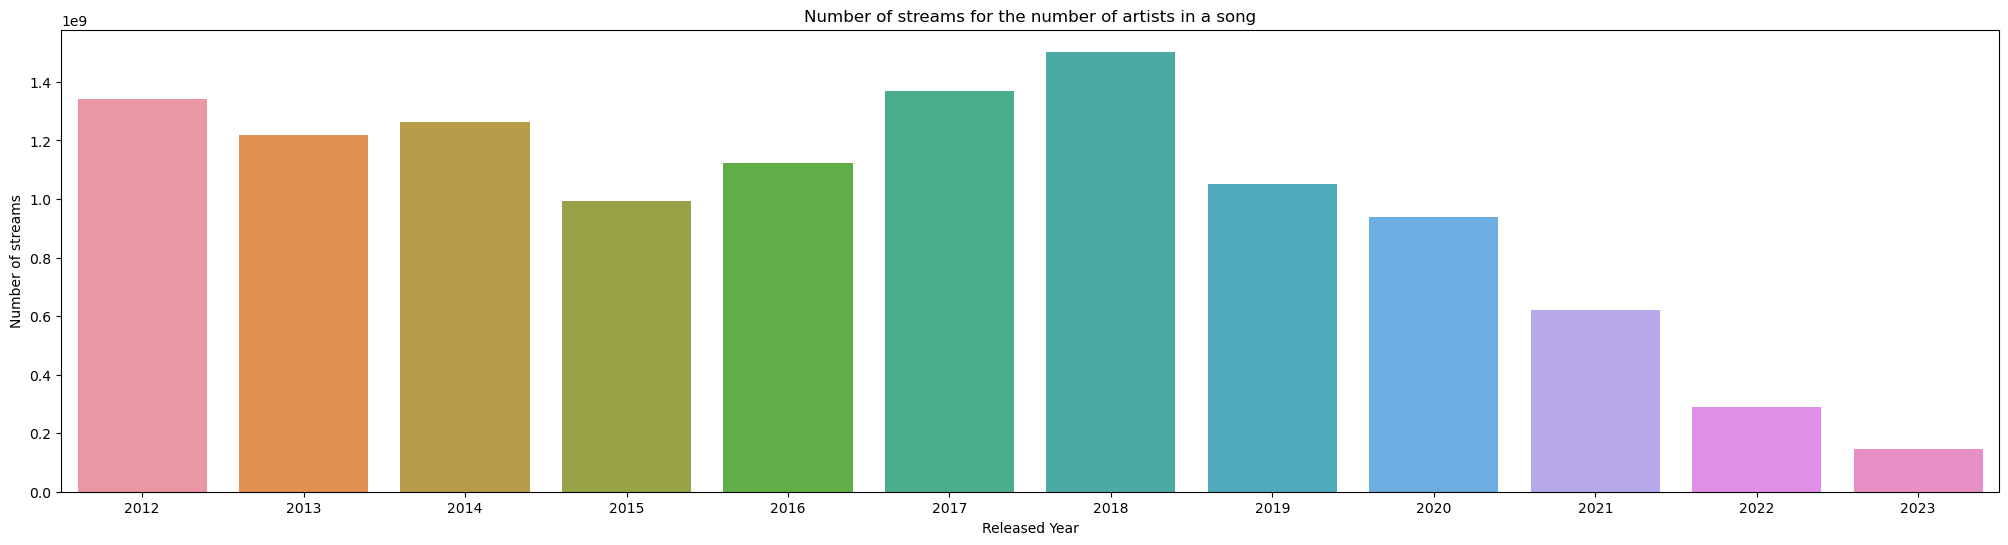

In [213]:
# explore years with maximum streams

unique_year = df["released_year"].unique()
unique_year = [year for year in unique_year if year > 2011]
print(unique_year)

values_year = []
for i in unique_year:
    values_year.append(df.loc[df["released_year"]==i]["streams"].mean())

plt.figure(figsize=(25, 6))
sns.barplot(x=unique_year,y=values_year)
plt.title("Number of streams for the number of artists in a song")
plt.xlabel("Released Year")
plt.ylabel("Number of streams")
plt.show()

Songs released in years 2017-2018 have the most streamed, however, the songs released in the recent years 2022-2023 have the least streams.

3. What is the distribution of number of artists of songs in spotify? 

In [214]:
unique_arr = df["artist_count"].unique()
unique_arr

array([2, 1, 3, 8, 4, 5, 6, 7])

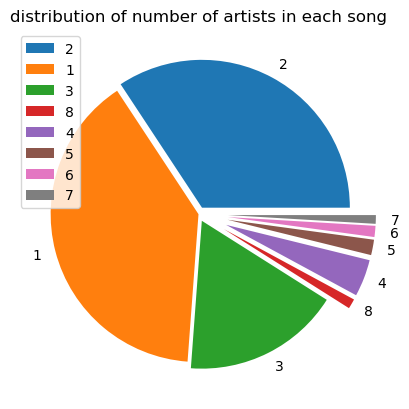

In [215]:
pie_arr=[]
for i in unique_arr:
    pie_arr.append(df.loc[df["artist_count"]==i]["artist_count"].sum().tolist())
labels = unique_arr
explode = [0.05,0,0.05,0.2,0.2,0.2,0.2,0.2]
plt.pie(pie_arr,labels = labels,explode = explode)
plt.title("distribution of number of artists in each song")
plt.legend()
plt.show()

**Observations**

* Majority of songs consist of a single artist
* The most number of artists present in a song are 8

4. Does the number of artists in a song correspond to the number of streams it may get?

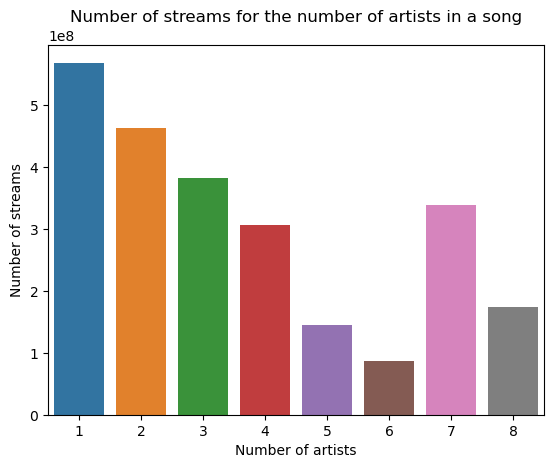

In [217]:
values_NoArtists = []
for i in unique_arr:
    values_NoArtists.append(df.loc[df["artist_count"]==i]["streams"].mean())
sns.barplot(x=unique_arr,y=values_NoArtists)
plt.title("Number of streams for the number of artists in a song")
plt.xlabel("Number of artists")
plt.ylabel("Number of streams")
plt.show()

**Observations**
* As we can see that as the number of artists increases in a song the number of steams it may get decreases 
* There is a downward trend
* However in a song with 7 artists has greater streams than the streams of songs with number of artists as 4
* We took the mean of the data because most songs have only 1 or 2 artists and that would be unfair for songs with more artists

In [218]:
print("the range is from ",df["bpm"].max(),"-",df["bpm"].min())

the range is from  206 - 65


5. In what range should be the beats per minute of a song for the song to have the most number of streams?

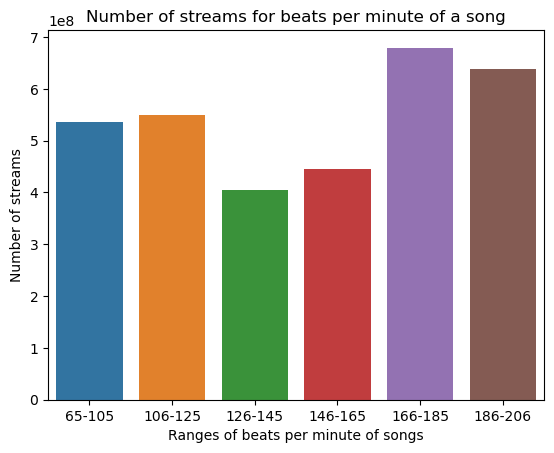

In [219]:
values_bpm = [
    df.loc[(df["bpm"]>=65) & (df["bpm"]<=105)]["streams"].mean(),
    df.loc[(df["bpm"]>=106) & (df["bpm"]<=125)]["streams"].mean(),
    df.loc[(df["bpm"]>=126) & (df["bpm"]<=145)]["streams"].mean(),
    df.loc[(df["bpm"]>=146) & (df["bpm"]<=165)]["streams"].mean(),
    df.loc[(df["bpm"]>=166) & (df["bpm"]<=185)]["streams"].mean(),
    df.loc[(df["bpm"]>=186) & (df["bpm"]<=206)]["streams"].mean(),
]
labels_bpm = ["65-105","106-125","126-145","146-165","166-185","186-206"]
sns.barplot(x =labels_bpm,y=values_bpm)
plt.title("Number of streams for beats per minute of a song")
plt.xlabel("Ranges of beats per minute of songs")
plt.ylabel("Number of streams")
plt.show()

**Observation**
* The songs with bpm in the range of 166-185 have the most number of streams
* The songs with bpm in the range of 126-145 have the least number of streams

6. How does the beats per minute of a song affect other audio features of a song like danceability? 

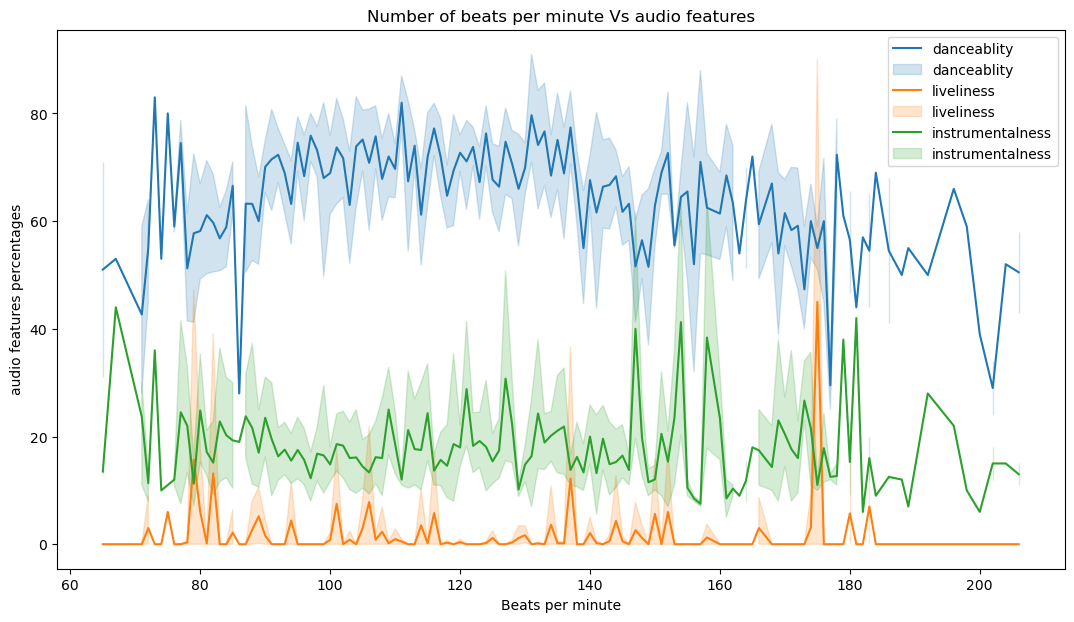

In [220]:
plt.figure(figsize=(13,7))
plt.title("Number of beats per minute Vs audio features")
plt.xlabel("Beats per minute")
plt.ylabel("audio features percentages")
sns.lineplot(x=df["bpm"].tolist(),y=df["danceability_%"].tolist())
sns.lineplot(x=df["bpm"].tolist(),y=df["instrumentalness_%"].tolist())
sns.lineplot(x=df["bpm"].tolist(),y=df["liveness_%"].tolist())
plt.legend(["danceablity", "danceablity","liveliness","liveliness","instrumentalness","instrumentalness"], loc ="upper right")
plt.show()

**Observations**
* There is a steep increase in the liveliness of a song for bpm around 160-180
* There is a steep decrease in the danceablity of a song for bpm aorund 80-100
* The instrumentalness of a song is equally distributed among all ranges of bpm

7. How are different audio features related to each other?

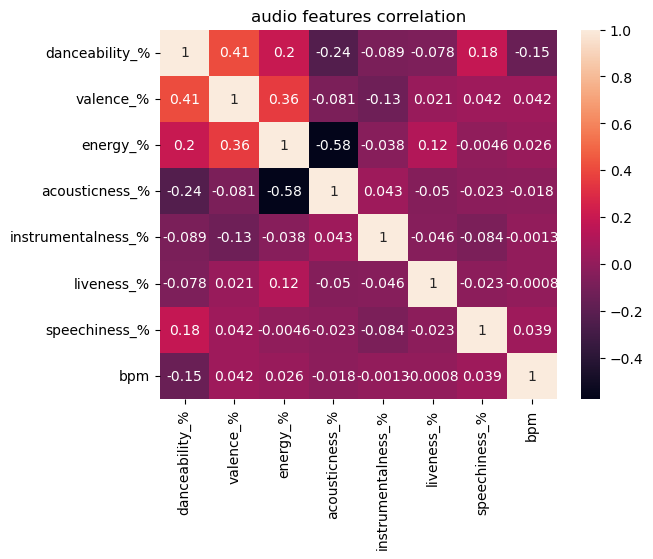

In [221]:
feature_columns = ["danceability_%", "valence_%", "energy_%", "acousticness_%", "instrumentalness_%", "liveness_%", "speechiness_%", 'bpm']
feature_matrix = df[feature_columns].corr()
sns.heatmap(feature_matrix,annot = True)
plt.title("audio features correlation")
plt.show()

**Observations**
* energy and acousticness don't go well together and are negativel correlated
* valenece and danceability have a good postive correlation with each other

Let us plot a scatter plot of different audio features with the nummber of streams a song gets and find their correlation

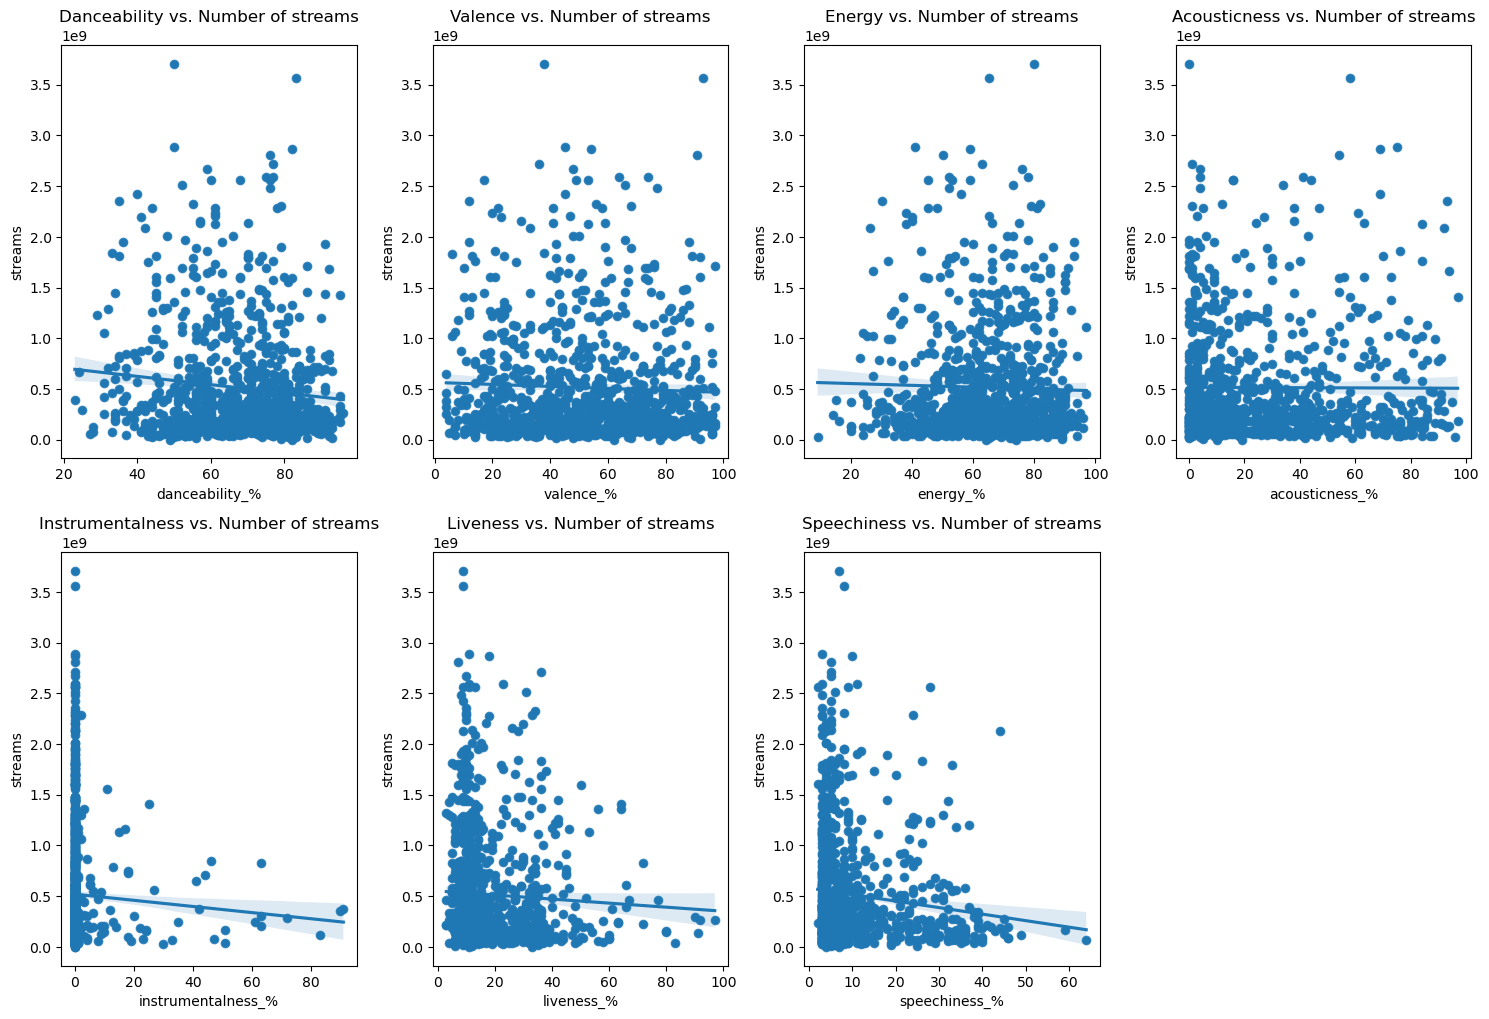

In [222]:
plt.figure(figsize=(15,20))
for i, feature in enumerate(feature_columns[:len(feature_columns)-1], start=1):
    plt.subplot(4,4, i)
    plt.title(feature.replace("_%","").capitalize() + " vs. Number of streams")
    plt.ylabel('Streams (in billions)')
    plt.xlabel(feature.replace("_%","").capitalize())
    sns.scatterplot(x=df[feature], y=df['streams'])
    sns.regplot(x=df[feature], y=df['streams'])
plt.tight_layout()

**Observations**
* Speechiness and streams are negatively correlated
* instrumentalness and streams are negatively correlated

**FIndings**
* The Weekend has the most number of streams in total and has the song with the most number of streams which is "Blinding Lights".
* A song is more likey to have success if it has a bpm in the range of 166-185.
* The songs with only one artist have the most number of streams.
* There is a steep decline in the danceablity if a song has around 85-90 bpm.
* There is a huge incline in the liveliness of a song if it has around 170-175 bpm. 
* The more the speechiness and instrumentalnes of a song the less likely it is to get more streams